In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open ("X.pickle","rb") as f:
    X = pickle.load (f)

with open ("y.pickle","rb") as f:
    y = pickle.load (f)

In [3]:
X = X/255
y = np.array (y)

In [4]:
X.shape[1:]

(75, 75, 1)

In [5]:
print (y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [6]:
#modello keras

model = Sequential ()

model.add (Conv2D (64,(3,3),input_shape = X.shape[1:]))
model.add (MaxPooling2D (pool_size=(2,2)))

model.add (Conv2D (64,(3,3)))
model.add (MaxPooling2D (pool_size=(2,2)))

model.add (Flatten ())
model.add(Dropout (0.2))
model.add (Dense (2,activation="softmax"))

In [7]:
model.compile (
    loss = "mse",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [8]:
model.fit (X,y,epochs = 3, batch_size = 32, validation_split = 0.3,shuffle = True)

Train on 17462 samples, validate on 7484 samples
Epoch 1/3
17462/17462 [==============================] - 11s 615us/sample - loss: 0.2110 - accuracy: 0.6626 - val_loss: 0.1828 - val_accuracy: 0.7277
Epoch 2/3
17462/17462 [==============================] - 8s 460us/sample - loss: 0.1729 - accuracy: 0.7443 - val_loss: 0.1734 - val_accuracy: 0.7418
Epoch 3/3
17462/17462 [==============================] - 8s 457us/sample - loss: 0.1595 - accuracy: 0.7692 - val_loss: 0.1787 - val_accuracy: 0.7348


In [9]:
model.summary ()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
_________________________________________________________________
dropout (Dropout)            (None, 18496)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3

In [16]:
model.save ("convModel.h5")

In [11]:
model.predict (X[5:6])

array([[0.03073323, 0.9692667 ]], dtype=float32)

In [15]:
y[5]

array([0., 1.])

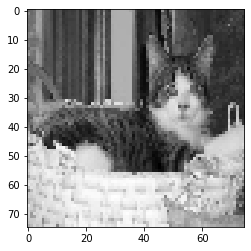

In [13]:
plt.imshow (X[5][:,:,0],cmap = "gray")